#  <center>"Charles Book Club Case"</center>

## 1. Импорт библиотек, загрузка датасета

In [14]:
import pandas as pd
#обработка и анализ данных
import numpy as np
#работа с массивами и математическими функциями
from sklearn import preprocessing
#предварительная обработка
from sklearn.linear_model import LogisticRegression
#работа с логистической регрессией
from sklearn.model_selection import train_test_split
#разделение данных на обучающие и тестовые
from sklearn.metrics import accuracy_score
#оценка модели
from sklearn.metrics import confusion_matrix
#построение матрицы ошибок
from sklearn  import tree
from sklearn.tree import DecisionTreeClassifier
#работа с деревьями решений
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#площадь под кривой ошибок
import matplotlib.pyplot as plt
#построение графиков
import seaborn as sns
#визуализация данных

Считывание csv файла и его запись в переменную df. Вывод датасета

In [3]:
df = pd.read_csv('CBC_4000.csv')
df

,Gender,Monetary,Recency,Frequency,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Related_purch,M_code,F_code,R_code,Florence
0,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,0.0
1,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0
2,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,3.0,0.0
3,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0
4,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,141.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0
3996,1,357.0,16.0,9.0,52.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,3.0,0.0
3997,0,48.0,12.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
3998,0,214.0,14.0,7.0,38.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0


## 2. Предварительная обработка данных

Вывод информации о размере датасета и типах данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         4000 non-null   int64  
 1   Monetary       4000 non-null   float64
 2   Recency        4000 non-null   float64
 3   Frequency      4000 non-null   float64
 4   FirstPurch     4000 non-null   float64
 5   ChildBks       4000 non-null   float64
 6   YouthBks       4000 non-null   float64
 7   CookBks        4000 non-null   float64
 8   DoItYBks       4000 non-null   float64
 9   RefBks         4000 non-null   float64
 10  ArtBks         4000 non-null   float64
 11  GeoBks         4000 non-null   float64
 12  ItalCook       4000 non-null   float64
 13  ItalAtlas      4000 non-null   float64
 14  ItalArt        4000 non-null   float64
 15  Related_purch  4000 non-null   float64
 16  M_code         4000 non-null   float64
 17  F_code         4000 non-null   float64
 18  R_code  

Данный набор состоит из 4000 экземпляров. Колонка 'gender' содержит данные типа int (целочисленные), а оставшиеся - float (с плавающей запятой)

Обнаружение пропусков

In [6]:
df.isna().sum()

Gender           0
Monetary         0
Recency          0
Frequency        0
FirstPurch       0
ChildBks         0
YouthBks         0
CookBks          0
DoItYBks         0
RefBks           0
ArtBks           0
GeoBks           0
ItalCook         0
ItalAtlas        0
ItalArt          0
Related_purch    0
M_code           0
F_code           0
R_code           0
Florence         0
dtype: int64

Пропуски не обнаружены

Запись в переменную df1 всех колонок, кроме Florence

In [7]:
df1 = df[["Gender","Monetary","Recency","Frequency","FirstPurch","ChildBks","YouthBks","CookBks","DoItYBks","RefBks","ArtBks","GeoBks","ItalCook","ItalAtlas","ItalArt","Related_purch","M_code","F_code","R_code"]]

### Отбор признаков с использованием случайного леса

Импорт библиотеки

In [8]:
from sklearn.ensemble import RandomForestClassifier

Для отбора признаков используется модель случайного леса с параметрами по умолчанию

In [11]:
rf = RandomForestClassifier()
rf.fit(df1, df.Florence)

RandomForestClassifier()

Построение графика, в котором ось X -признаки, а Y - важность каждого признака

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

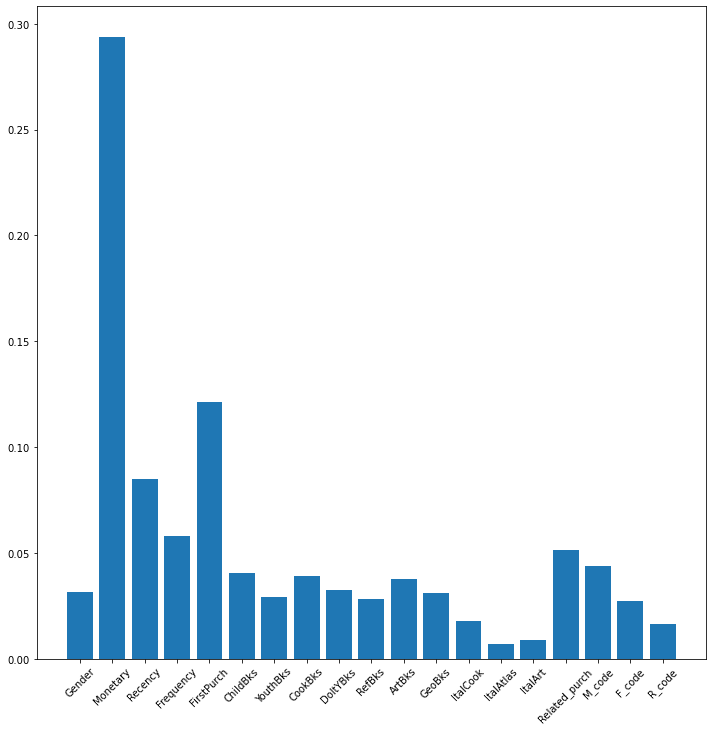

In [12]:
plt.figure(figsize=(12,12))
plt.bar(df1.columns, clf.feature_importances_)
plt.xticks(rotation=45)

Призаки Monetary (общая сумма потраченная на книги), Recency (сколько месяцев прошло с последней покупки), Frequency (количество покупок), FirstPurch (сколько месяцев прошло с первой покупки), Related purchase (количество приобретенных книг по схожей тематике) являются наиболее важными характеристиками.

## 3. Построение модели логистической регрессии

Подготовка матрицы признаков X и ответов y

In [20]:
X=df[["Monetary","Recency","Frequency","FirstPurch","Related_purch"]]
y=df['Florence']

Разделение данных на обучающие и тестовые (70% на обучение и 30% на оценку)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

Построение модели LogisticRegression с параметрами по умолчанию (т.к параметры по умолчанию показывают лучший результат)

In [22]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

LogisticRegression()

Для улучшения точности модели введены пороговые значения 0.2, 0.5 и 0.8

In [23]:
y_pred1 = np.where(model_logreg.predict_proba(X_test)[:,1] > 0.2, 1, 0)
y_pred2 = np.where(model_logreg.predict_proba(X_test)[:,1] > 0.5, 1, 0)
y_pred3 = np.where(model_logreg.predict_proba(X_test)[:,1] > 0.8, 1, 0)

### Построение матрицы ошибок для каждого порогового значения

In [24]:
conf1 = confusion_matrix(y_test, y_pred1)
conf2 = confusion_matrix(y_test, y_pred2)
conf3 = confusion_matrix(y_test, y_pred3)

<AxesSubplot:>

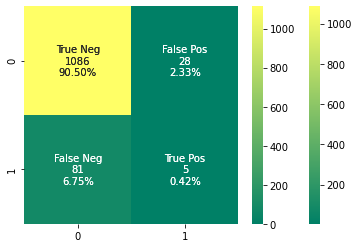

In [31]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf1.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf1, annot=labels, fmt='', cmap='summer')

<AxesSubplot:>

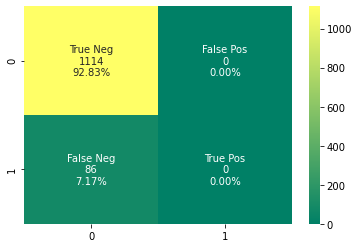

In [46]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf2.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf2, annot=labels, fmt='', cmap='summer')

<AxesSubplot:>

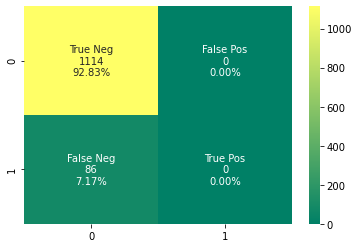

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf3.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf3, annot=labels, fmt='', cmap='summer')

Запись значений матрицы ошибок для пороговых значений в переменные tn, fp, fn, tp

In [47]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred1).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred3).ravel()

### Расчет Accuracy for Florence=1 (TPR), Accuracy for Florence=0 (FPR) и Total Accuracy для каждого порогового значения

In [83]:
TPR1 = tp1/(tp1 + fn1)
FPR1 = fp1/(fp1 + tn1)
TA1 = (tn1 + tp1) / (tn1 + tp1 + fp1 + fn1)
print("Accuracy_For_Florence = 1 0.2:", TPR1)
print("Accuracy_For_Florence = 0: 0.2", FPR1)
print("Total Accuracy ", TA1)

Accuracy_For_Florence = 1 0.2: 0.05813953488372093
Accuracy_For_Florence = 0: 0.2 0.025134649910233394
Total Accuracy  0.9091666666666667


In [84]:
TPR2 = tp2/(tp2 + fn2)
FPR2 = fp2/(fp2 + tn2)
TA2 = (tn2 + tp2) / (tn2 + tp2 + fp2 + fn2)
print("Accuracy_For_Florence = 1 0.5:", TPR2)
print("Accuracy_For_Florence = 0: 0.5", FPR2)
print("Total Accuracy ", TA2)

Accuracy_For_Florence = 1 0.5: 0.0
Accuracy_For_Florence = 0: 0.5 0.0
Total Accuracy  0.9283333333333333


In [85]:
TPR3 = tp3/(tp3 + fn3)
FPR3 = fp3/(fp3 + tn3)
TA3 = (tn3 + tp3) / (tn3 + tp3 + fp3 + fn3)
print("Accuracy_For_Florence = 1 0.8:", TPR3)
print("Accuracy_For_Florence = 0: 0.8", FPR3)
print("Total Accuracy ", TA3)

Accuracy_For_Florence = 1 0.8: 0.0
Accuracy_For_Florence = 0: 0.8 0.0
Total Accuracy  0.9283333333333333


Лучший результат TPR и FPR показала модель с пороговым значением 0.2
Модели с пороговым значением 0.5 и 0.8 показали одинаковое значение Total Accuracy, которое получилось лучше, чем у модели с 0.2

### Нахождение ROC AUC score для всех пороговых значений

In [52]:
auc_score1 = roc_auc_score(y_test, y_pred1[:])
auc_score2 = roc_auc_score(y_test, y_pred2[:])
auc_score3 = roc_auc_score(y_test, y_pred3[:])
print(auc_score1, auc_score2,auc_score3)

0.5165024424867438 0.5 0.5


Лучший auc score дала модель с порогом 0.2

### Построение графика ROC AUC

Кривая roc для моделей

In [53]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred1[:], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred2[:], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred3[:], pos_label=1)

Кривая roc для tpr = fpr

In [56]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

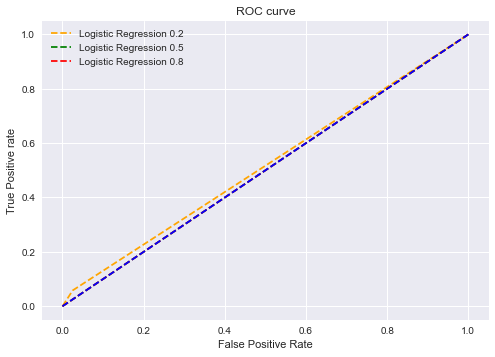

In [57]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression 0.2')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression 0.5')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression 0.8')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Лучший результат показала модель с пороговым значением 0.2

## 3. Построение модели DecisionTreeClassifier

Построение модели со следующими параметрами: критерий 'entropy', разделение 'best', максимальная глубина 10. Обучение модели на обучающих данных

In [59]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 9)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

Импорт библиотек для визуализации дерева решений

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.tree import export_graphviz
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


C:\Users\baiko\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Визуализация дерева решений

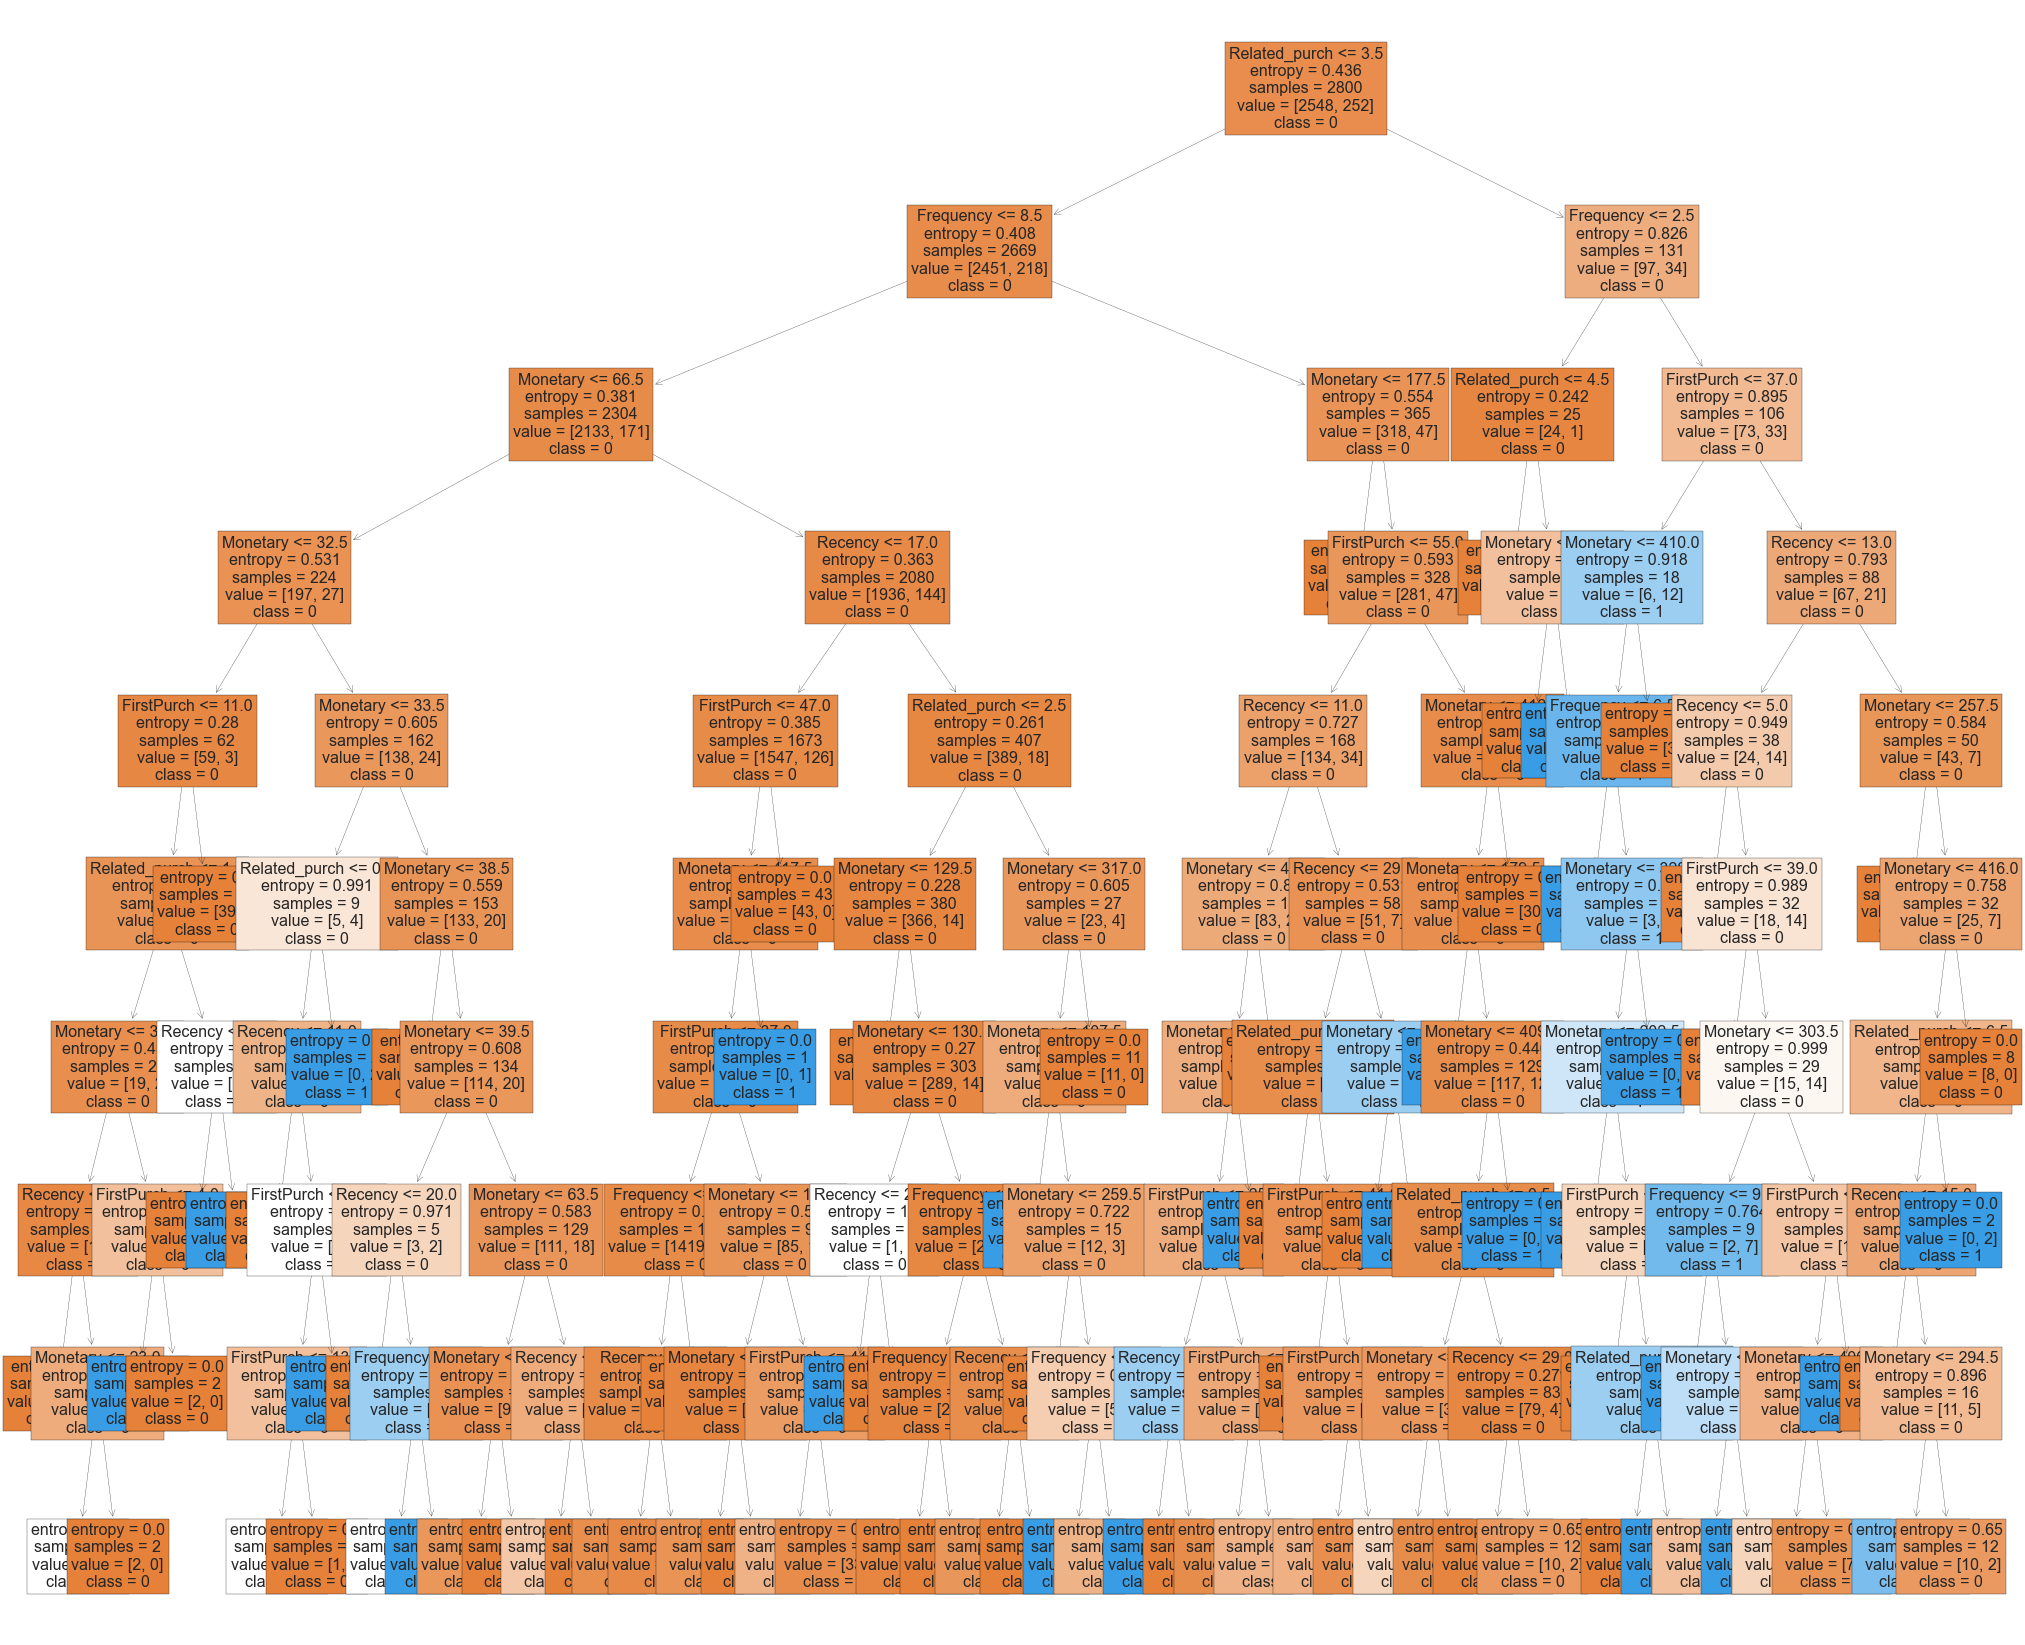

In [63]:
fig = plt.figure(figsize = (35, 30))
_ = tree.plot_tree(dtree, fontsize=16,
                   feature_names=["Monetary","Recency","Frequency","FirstPurch","Related_purch"],  
                   class_names=['0', '1'],
                   filled=True)

Критерий entropy отвечает за измерение качества раскола, splitter best - выбирает лучший раскол, а max-depth отвечает за максимальную глубину дерева, то есть пока она не достигнет 9.

Задание пороговых значений

In [64]:
y_predt1 = np.where(dtree.predict_proba(X_test)[:,1] > 0.2, 1, 0)
y_predt2 = np.where(dtree.predict_proba(X_test)[:,1] > 0.5, 1, 0)
y_predt3 = np.where(dtree.predict_proba(X_test)[:,1] > 0.8, 1, 0)

### Построение матрицы ошибок для каждого порогового значения

In [70]:
conft1 = confusion_matrix(y_test, y_predt1)
conft2 = confusion_matrix(y_test, y_predt2)
conft3 = confusion_matrix(y_test, y_predt3)

<AxesSubplot:>

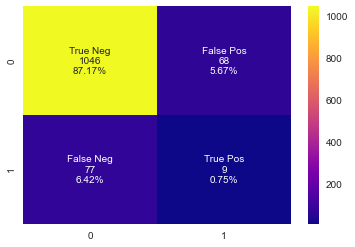

In [67]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conft1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conft1.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conft1, annot=labels, fmt='', cmap='plasma')

<AxesSubplot:>

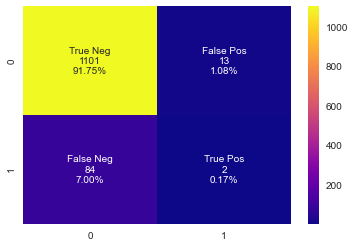

In [68]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conft2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conft2.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conft2, annot=labels, fmt='', cmap='plasma')

<AxesSubplot:>

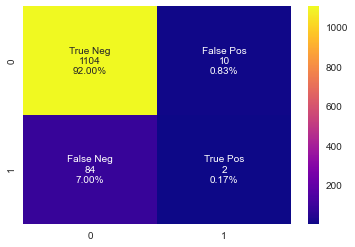

In [71]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conft3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conft3.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conft3, annot=labels, fmt='', cmap='plasma')

Запись значений матрицы ошибок для пороговых значений в переменные tn, fp, fn, tp

In [76]:
tnt1, fpt1, fnt1, tpt1 = confusion_matrix(y_test, y_predt1).ravel()
tnt2, fpt2, fnt2, tpt2 = confusion_matrix(y_test, y_predt2).ravel()
tnt3, fpt3, fnt3, tpt3 = confusion_matrix(y_test, y_predt3).ravel()

### Расчет Accuracy for Florence=1 (TPR), Accuracy for Florence=0 (FPR) и Total Accuracy для каждого порогового значения

In [80]:
TPRT1 = tpt1/(tpt1 + fnt1)
FPRT1 = fpt1/(fpt1 + tnt1)
TAT1 = (tnt1 + tpt1) / (tnt1 + tpt1 + fpt1 + fnt1)
print("Accuracy_For_Florence = 1 0.2:", TPRT1)
print("Accuracy_For_Florence = 0: 0.2", FPRT1)
print("Toral accuracy = ",TAT1)

Accuracy_For_Florence = 1 0.2: 0.10465116279069768
Accuracy_For_Florence = 0: 0.2 0.06104129263913824
Toral accuracy =  0.8791666666666667


In [81]:
TPRT2 = tpt2/(tpt2 + fnt2)
FPRT2 = fpt2/(fpt2 + tnt2)
TAT2 = (tnt2 + tpt2) / (tnt2 + tpt2 + fpt2 + fnt2)
print("Accuracy_For_Florence = 1 0.5:", TPRT2)
print("Accuracy_For_Florence = 0: 0.5", FPRT2)
print("Toral accuracy = ",TAT2)

Accuracy_For_Florence = 1 0.5: 0.023255813953488372
Accuracy_For_Florence = 0: 0.5 0.011669658886894075
Toral accuracy =  0.9191666666666667


In [82]:
TPRT3 = tpt3/(tpt3 + fnt3)
FPRT3 = fpt3/(fpt3 + tnt3)
TAT3 = (tnt3 + tpt3) / (tnt3 + tpt3 + fpt3 + fnt3)
print("Accuracy_For_Florence = 1 0.8:", TPRT3)
print("Accuracy_For_Florence = 0: 0.8", FPRT3)
print("Toral accuracy = ",TAT3)

Accuracy_For_Florence = 1 0.8: 0.023255813953488372
Accuracy_For_Florence = 0: 0.8 0.008976660682226212
Toral accuracy =  0.9216666666666666


Лучший результат TPR и FPR показала модель с пороговым значением 0.5

Лучший результат Total Accuracy показала модель с пороговым значением 0.8

### Нахождение ROC AUC score для всех пороговых значений

In [72]:
auc_scoret1 = roc_auc_score(y_test, y_predt1[:])
auc_scoret2 = roc_auc_score(y_test, y_predt2[:])
auc_scoret3 = roc_auc_score(y_test, y_predt3[:])
(auc_scoret1,auc_scoret2,auc_scoret3)

(0.5218049350757796, 0.5057930775332972, 0.507139576635631)

Лучший roc auc дала модель с пороговым значением 0.2

### Построение графика ROC AUC

Кривая roc для моделей

In [73]:
fprt1, tprt1, thresht1 = roc_curve(y_test, y_predt1[:], pos_label=1)
fprt2, tprt2, thresht2 = roc_curve(y_test, y_predt2[:], pos_label=1)
fprt3, tprt3, thresht3 = roc_curve(y_test, y_predt3[:], pos_label=1)

Кривая roc для tpr = fpr

In [74]:
random_probs = [0 for i in range(len(y_test))]
p_fprt, p_tprt, _ = roc_curve(y_test, random_probs, pos_label=1)

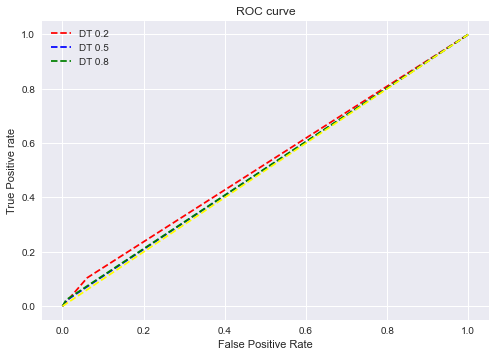

In [75]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fprt1, tprt1, linestyle='--',color='red', label='DT 0.2')
plt.plot(fprt2, tprt2, linestyle='--',color='blue', label='DT 0.5')
plt.plot(fprt3, tprt3, linestyle='--',color='green', label='DT 0.8')
plt.plot(p_fpr, p_tpr, linestyle='--', color='yellow')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Лучший результат дала модель с пороговым значением 0.2

## 3. Построение модели BaggingClassifier

Импорт необходимых библиотек

In [90]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Построение модели дерева решений с параметром random_state = 42

In [91]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Построение модели BaggingClassifier с моделью дерева решений в качестве базового оценщика, количеством оценщиков 300 и значением random_state 42

In [94]:
b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300,
                  random_state=42)

Задание пороговых значений

In [95]:
y_predtb1 = np.where(b_dtree.predict_proba(X_test)[:,1] > 0.2, 1, 0)
y_predtb2 = np.where(b_dtree.predict_proba(X_test)[:,1] > 0.5, 1, 0)
y_predtb3 = np.where(b_dtree.predict_proba(X_test)[:,1] > 0.8, 1, 0)

### Построение матрицы ошибок для каждого порогового значения

In [96]:
conftb1 = confusion_matrix(y_test, y_predtb1)
conftb2 = confusion_matrix(y_test, y_predtb2)
conftb3 = confusion_matrix(y_test, y_predtb3)

<AxesSubplot:>

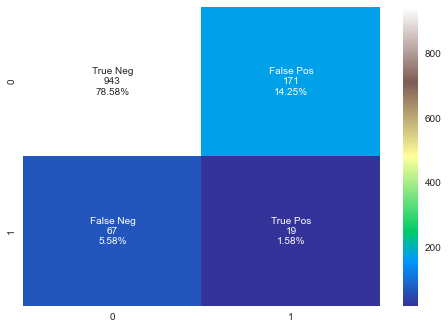

In [98]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conftb1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conftb1.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conftb1, annot=labels, fmt='', cmap='terrain')

<AxesSubplot:>

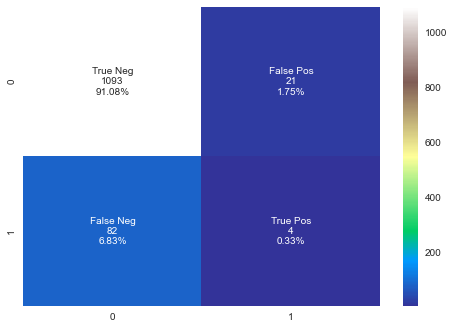

In [99]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conftb2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conftb2.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conftb2, annot=labels, fmt='', cmap='terrain')

<AxesSubplot:>

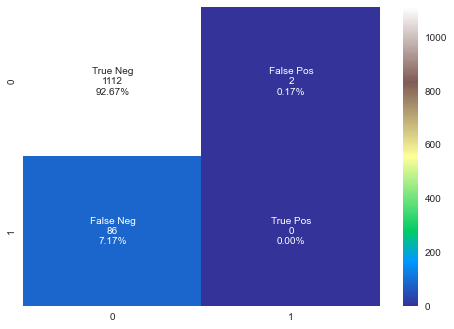

In [100]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conftb3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conftb3.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conftb3, annot=labels, fmt='', cmap='terrain')

Запись значений матрицы ошибок для пороговых значений в переменные tn, fp, fn, tp

In [101]:
tntb1, fptb1, fntb1, tptb1 = confusion_matrix(y_test, y_predtb1).ravel()
tntb2, fptb2, fntb2, tptb2 = confusion_matrix(y_test, y_predtb2).ravel()
tntb3, fptb3, fntb3, tptb3 = confusion_matrix(y_test, y_predtb3).ravel()

### Расчет Accuracy for Florence=1 (TPR), Accuracy for Florence=0 (FPR) и Total Accuracy для каждого порогового значения

In [102]:
TPRTB1 = tptb1/(tptb1 + fntb1)
FPRTB1 = fptb1/(fptb1 + tntb1)
TATB1 = (tntb1 + tptb1) / (tntb1 + tptb1 + fptb1 + fntb1)
print("Accuracy_For_Florence = 1 0.2:", TPRTB1)
print("Accuracy_For_Florence = 0: 0.2", FPRTB1)
print("Toral accuracy = ",TATB1)

Accuracy_For_Florence = 1 0.2: 0.22093023255813954
Accuracy_For_Florence = 0: 0.2 0.15350089766606823
Toral accuracy =  0.8016666666666666


In [104]:
TPRTB2 = tptb2/(tptb2 + fntb2)
FPRTB2 = fptb2/(fptb2 + tntb2)
TATB2 = (tntb2 + tptb2) / (tntb2 + tptb2 + fptb2 + fntb2)
print("Accuracy_For_Florence = 1 0.5:", TPRTB2)
print("Accuracy_For_Florence = 0: 0.5", FPRTB2)
print("Toral accuracy = ",TATB2)

Accuracy_For_Florence = 1 0.5: 0.046511627906976744
Accuracy_For_Florence = 0: 0.5 0.018850987432675045
Toral accuracy =  0.9141666666666667


In [105]:
TPRTB3 = tptb3/(tptb3 + fntb3)
FPRTB3 = fptb3/(fptb3 + tntb3)
TATB3 = (tntb3 + tptb3) / (tntb3 + tptb3 + fptb3 + fntb3)
print("Accuracy_For_Florence = 1 0.5:", TPRTB3)
print("Accuracy_For_Florence = 0: 0.5", FPRTB3)
print("Toral accuracy = ",TATB3)

Accuracy_For_Florence = 1 0.5: 0.0
Accuracy_For_Florence = 0: 0.5 0.0017953321364452424
Toral accuracy =  0.9266666666666666


Лучший результат TPR и FPR показала модель с пороговым значением 0.2

Лучший результат Total Accuracy показала модель с пороговым значением 0.8

### Нахождение ROC AUC score для всех пороговых значений

In [106]:
auc_scoretb1 = roc_auc_score(y_test, y_predtb1[:])
auc_scoretb2 = roc_auc_score(y_test, y_predtb2[:])
auc_scoretb3 = roc_auc_score(y_test, y_predtb3[:])
(auc_scoretb1,auc_scoretb2,auc_scoretb3)

(0.5337146674460356, 0.5138303202371509, 0.4991023339317774)

Лучший roc auc дала модель с пороговым значением 0.2

### Построение графика ROC AUC

Кривая roc для моделей

In [107]:
fprtb1, tprtb1, threshtb1 = roc_curve(y_test, y_predtb1[:], pos_label=1)
fprtb2, tprtb2, threshtb2 = roc_curve(y_test, y_predtb2[:], pos_label=1)
fprtb3, tprtb3, threshtb3 = roc_curve(y_test, y_predtb3[:], pos_label=1)

Кривая roc для tpr = fpr

In [108]:
random_probs = [0 for i in range(len(y_test))]
p_fprtb, p_tprtb, _ = roc_curve(y_test, random_probs, pos_label=1)

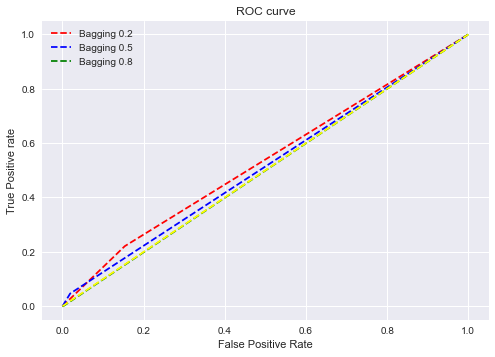

In [110]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fprtb1, tprtb1, linestyle='--',color='red', label='Bagging 0.2')
plt.plot(fprtb2, tprtb2, linestyle='--',color='blue', label='Bagging 0.5')
plt.plot(fprtb3, tprtb3, linestyle='--',color='green', label='Bagging 0.8')
plt.plot(p_fprtb, p_tprtb, linestyle='--', color='yellow')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Лучший результат дала модель с пороговым значением 0.2

## Выбор лучшей модели

#### Лучший результат у модели логистической регрессии с пороговым значением 0.2: 

Accuracy for Florence=1 (TPR) = 0.05813953488372093

Accuracy for Florence=0 (FPR)  = 0.025134649910233394

ROC AUC score = 0.5165024424867438

#### Лучший результат у модели DecisionTreeClassifier с пороговым значением 0.2:
    
Accuracy for Florence=1 (TPR) = 0.10465116279069768

Accuracy for Florence=0 (FPR) = 0.06104129263913824

ROC AUC score = 0.5218049350757796

#### Лучший результат у модели BaggingClassifier с пороговым значением 0.2:
    
Accuracy for Florence=1 (TPR) = 0.22093023255813954

Accuracy for Florence=0 (FPR) = 0.15350089766606823

ROC AUC score = 0.5337146674460356